In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
import os
import sys

In [2]:
df_credit = pd.read_csv('../data/credit_card.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_fraud = pd.read_csv('../data/Fraud_Data.csv')
df_merged = pd.read_csv('../data/Merged_Fraud_Data.csv')
df_merged.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,Australia
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,Thailand
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,China
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,China
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,Thailand


In [4]:
##Normalize & Scale Numerical Features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical features for scaling
num_features = ["purchase_value",'age']

# Apply StandardScaler (mean = 0, std = 1)
scaler = StandardScaler()
df_fraud[num_features] = scaler.fit_transform(df_fraud[num_features])

# Display scaled values
print(df_fraud[num_features].head())

   purchase_value       age
0       -0.160204  0.679914
1       -1.142592  2.304476
2       -1.197169  2.304476
3        0.385567  0.911994
4        0.112681  1.376155


In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Features to One-Hot Encode (only low-cardinality ones)
low_cardinality_features = ["source", "sex", "browser"]  # Avoid "device_id"

# Features to Label Encode (high-cardinality ones)
high_cardinality_features = ["device_id", "country"]

# One-Hot Encode only low-cardinality categorical variables
df_merged = pd.get_dummies(df_merged, columns=low_cardinality_features, drop_first=True)

# Label Encode high-cardinality features
label_encoder = LabelEncoder()
for feature in high_cardinality_features:
    if feature in df_merged.columns:
        df_merged[feature] = label_encoder.fit_transform(df_merged[feature])

# Display transformed data
print(df_merged.head())

   user_id          signup_time        purchase_time  purchase_value  \
0   247547  2015-06-28 03:00:34  2015-08-09 03:57:29              47   
1   220737  2015-01-28 14:21:11  2015-02-11 20:28:28              15   
2   390400  2015-03-19 20:49:09  2015-04-11 23:41:23              44   
3    69592  2015-02-24 06:11:57  2015-05-23 16:40:14              55   
4   174987  2015-07-07 12:58:11  2015-11-03 04:04:30              51   

   device_id  age  ip_address  class  country  source_Direct  source_SEO  \
0      46780   30    16778864      0        7          False        True   
1      70073   34    16842045      0      162          False        True   
2      53448   29    16843656      0       36          False       False   
3      92195   30    16938732      0       36           True       False   
4     107434   37    16971984      0      162          False        True   

   sex_M  browser_FireFox  browser_IE  browser_Opera  browser_Safari  
0  False            False       False  

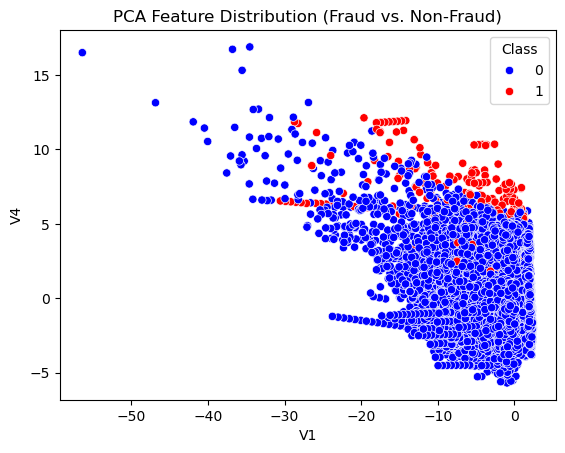

In [6]:
# Select first two PCA components
sns.scatterplot(x=df_credit["V1"], y=df_credit["V4"], hue=df_credit["Class"], palette=["blue", "red"])
plt.title("PCA Feature Distribution (Fraud vs. Non-Fraud)")
plt.show()

In [7]:
# Select numerical features for scaling
num_features = ["Amount"]

# Apply StandardScaler (mean = 0, std = 1)
scaler = StandardScaler()
df_credit[num_features] = scaler.fit_transform(df_credit[num_features])

# Display scaled values
print(df_credit[num_features].head())

     Amount
0  0.244964
1 -0.342475
2  1.160686
3  0.140534
4 -0.073403


In [8]:
# For credit card dataset
X_credit = df_credit.drop(columns=["Class"])
y_credit = df_credit["Class"]

# For fraud dataset
X_fraud = df_merged.drop(columns=["class","purchase_time", "signup_time"])
y_fraud = df_merged["class"]


In [9]:
from sklearn.model_selection import train_test_split

# Split for credit card fraud dataset
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size=0.2, random_state=42)

# Split for e-commerce fraud dataset
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42)


In [ ]:
##Model Training & Evaluation for creidit data

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=50)
}

# Training loop
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_credit, y_train_credit)
    y_pred = model.predict(X_test_credit)

    results[name] = {
        "Accuracy": accuracy_score(y_test_credit, y_pred),
        "Precision": precision_score(y_test_credit, y_pred),
        "Recall": recall_score(y_test_credit, y_pred),
        "F1 Score": f1_score(y_test_credit, y_pred),
    }

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


Training Logistic Regression...


c:\Users\hp\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training MLP...
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.998859   0.726027  0.540816  0.619883
Decision Tree        0.999034   0.697248  0.775510  0.734300
Random Forest        0.999596   0.962963  0.795918  0.871508
Gradient Boosting    0.998947   0.737500  0.602041  0.662921
MLP                  0.998244   0.000000  0.000000  0.000000


In [11]:
##Model Training & Evaluation for fraud data

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=50)
}

# Training loop
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_fraud, y_train_fraud)
    y_pred = model.predict(X_test_fraud)

    results[name] = {
        "Accuracy": accuracy_score(y_test_fraud, y_pred),
        "Precision": precision_score(y_test_fraud, y_pred),
        "Recall": recall_score(y_test_fraud, y_pred),
        "F1 Score": f1_score(y_test_fraud, y_pred),
    }

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

Training Logistic Regression...


c:\Users\hp\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training MLP...
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.906659   0.000000  0.000000  0.000000
Decision Tree        0.890283   0.427394  0.516383  0.467693
Random Forest        0.947193   0.909945  0.481958  0.630152
Gradient Boosting    0.906852   0.857143  0.002489  0.004963
MLP                  0.906659   0.000000  0.000000  0.000000


c:\Users\hp\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
##CNN for Fraud Detection

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

cnn_model = Sequential([
    Conv1D(32, 3, activation="relu", input_shape=(X_train_credit.shape[1], 1)),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

cnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
cnn_model.fit(X_train_credit, y_train_credit, epochs=10, batch_size=32, validation_data=(X_test_credit, y_test_credit))


c:\Users\hp\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9937 - loss: 2.8870 - val_accuracy: 0.9976 - val_loss: 0.0280
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9988 - loss: 0.0386 - val_accuracy: 0.9992 - val_loss: 0.0090
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9993 - loss: 0.0063 - val_accuracy: 0.9994 - val_loss: 0.0037
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9993 - loss: 0.0054 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9993 - loss: 0.0052 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.9991 - val_loss: 0.0034
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9994 - loss: 0.0050 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9994 - loss: 0

In [13]:
## LSTM for Sequential Data

from tensorflow.keras.layers import LSTM, Dropout

lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_credit.shape[1], 1)),
    Dropout(0.2),
    LSTM(32),
    Dense(1, activation="sigmoid")
])

lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
lstm_model.fit(X_train_credit, y_train_credit, epochs=10, batch_size=32, validation_data=(X_test_credit, y_test_credit))


Epoch 1/10


c:\Users\hp\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 180s 25ms/step - accuracy: 0.9983 - loss: 0.0147 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 174s 24ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 173s 24ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 196s 28ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 177s 25ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 181s 25ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 169s 24ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 166s 23ms/step - accuracy: 0.9994 - lo

In [18]:
import mlflow
import mlflow.sklearn
mlflow.sklearn.autolog()
mlflow.log_param("LogisticRegression", name)


'Decision Tree'

In [19]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment("Credit_Fraud_Detection")

# Main MLflow Run
with mlflow.start_run():
    for name, model in models.items():
        print(f"Training {name}...")

        # Start a nested run for each model
        with mlflow.start_run(nested=True):
            model.fit(X_train_credit, y_train_credit)
            y_pred = model.predict(X_test_credit)

            # Compute metrics
            accuracy = accuracy_score(y_test_credit, y_pred)
            precision = precision_score(y_test_credit, y_pred)
            recall = recall_score(y_test_credit, y_pred)
            f1 = f1_score(y_test_credit, y_pred)

            # Log parameters and metrics
            mlflow.log_param("model_name", name)  # Now each model has its own "model_name"
            mlflow.log_metric("accuracy", accuracy)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("recall", recall)
            mlflow.log_metric("f1_score", f1)

            # Log the trained model
            mlflow.sklearn.log_model(model, f"model_{name}")

print("Training and logging completed!")




Exception: Run with UUID 54137398166a4123a042851fd88d4061 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True

In [15]:
import shap
import numpy as np

# Initialize SHAP explainer with a custom function
explainer = shap.Explainer(lambda x: model.predict_proba(x), X_train_credit)

# Compute SHAP values
shap_values = explainer(X_test_credit)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Amount
- Time
- V1
- V10
- V11
- ...
Feature names seen at fit time, yet now missing:
- age
- browser_FireFox
- browser_IE
- browser_Opera
- browser_Safari
- ...


In [ ]:
###credit data model traning


In [ ]:
shap.summary_plot(shap_values, X_test_credit)


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test_credit.iloc[0])


In [ ]:
shap.dependence_plot("feature_name", shap_values, X_test_credit)


In [ ]:
##Using LIME for Explainability
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train_credit.values, 
                                 feature_names=X_train_credit.columns, 
                                 class_names=['Not Fraud', 'Fraud'], 
                                 mode='classification')


In [ ]:
exp = explainer.explain_instance(X_test_credit.iloc[0].values, model.predict_proba)
exp.show_in_notebook()

In [ ]:
exp.as_pyplot_figure()